# Mapeando el Universo



## Análisis y Curación

 **1 - Análisis general**
 
 * Describir el conjunto de datos. Tratamiento de datos faltantes, outliers, datos repetidos.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 * Implementar herramientas en pos de la reproducibilidad de resultados.
 
**2 - Análisis estadístico** 
  * Nos ha contado el especialista que del proceso de adquisición de los mismos se asegura que los datos son correctos y/o completos para aquellos objetos que tienen Magnitudes Pretosian en la banda r entre 14.5 y 17.77. Incluyan esta selección en su análisis.
  * Explorar la base de datos en búsqueda de datos repetidos, en caso de hallarlos elegir la estrategia para su limpieza.
  * Dado que los datos son recolectados a través de mapeos sucesivos del cielo es posible que una galaxia sea observada más de una vez, y en cada observación se le asigne un ID diferente. Propongan una idea para defectar la base de datos de este problema.
       * **Extra**: el especialista en datos no confía en objetos que tengan una separación angular con otro objeto menor a 1" de arco. Intenten limpiar los datos empleando este criterio.
  * Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.
  * Añadir los campos con los colores calculados tanto para magnitudes petrosian como magnitudes model.
  * En función de las correlaciones observadas en el práctico anterior, y con respecto a nuestra variable objetivo, propongan qué variables se podría excluir del dataset. 
  * Guardar el dataset "limpio" y generar un archivo README que contenga todos los pasos implementados en la curación de los datos.
  * Armen un contenedor de docker con las versiones exactas de todas las bibliotecas utilizadas.

### Dependencias

In [1]:
!pip install pandas numpy matplotlib seaborn

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename = "../data/DiploDatos.csv"
df = pd.read_csv(filename,index_col=0)
df.head(5)

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,143.99710,139.90170,137.91640,139.46250,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,109.15540,69.38792,71.79784,71.49205,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,38.84409,27.95161,26.12152,24.82063,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,83.49393,75.81385,77.89085,76.89522,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,99.11900,92.17690,95.97627,96.26978,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450


figsize=(15,15)### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [5]:
filename = '../data/DiploDatos_Zoo.csv'
zoo = pd.read_csv(filename,index_col=0)
dd = df.join(zoo)
dd

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0.0,0.0,1.0
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0.0,0.0,1.0
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1.0,0.0,0.0
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0.0,1.0,0.0
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,96.269780,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,NaN,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,...,24.327620,25.63022,0.116248,0.090580,0.062663,0.046565,0.034636,0.0,0.0,1.0
957077357326264320,0.084226,0.000017,0,STARFORMING,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,...,89.509990,89.86601,0.131573,0.102520,0.070923,0.052704,0.039202,1.0,0.0,0.0
957066637087893504,0.141610,0.000030,0,NaN,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,...,121.233000,115.68470,0.139073,0.108365,0.074966,0.055708,0.041437,1.0,0.0,0.0


# **1 - Análisis general** 

 * Describir el conjunto de datos. Tratamiento de datos faltantes, outliers, datos repetidos.

In [6]:
dd.shape

(864064, 118)

In [7]:
dd.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,621957.000000,621957.000000,621957.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,...,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125,0.286160,0.093688,0.620152
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,...,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430,0.451965,0.291395,0.485349
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,...,-9999.008000,-10000.210000,0.012519,0.009755,0.006748,0.005015,0.003730,0.000000,0.000000,0.000000
25%,0.073795,0.000012,0.000000,87.723450,9.822191,145.630565,6.390797,0.006289,0.006177,19.136530,...,47.551773,48.464130,0.079351,0.061830,0.042773,0.031785,0.023642,0.000000,0.000000,0.000000
50%,0.115355,0.000021,0.000000,142.108400,13.798750,183.556438,21.064065,0.010219,0.010032,19.879295,...,90.660525,89.476295,0.118164,0.092072,0.063695,0.047332,0.035207,0.000000,0.000000,1.000000
75%,0.175229,0.000035,0.000000,202.606025,21.750100,221.970898,37.825780,0.019530,0.019184,20.718253,...,132.924200,130.529275,0.176289,0.137363,0.095027,0.070615,0.052525,1.000000,0.000000,1.000000
max,1.002166,635.625600,148.000000,850.000000,2262.742000,359.997922,71.767356,84.120962,80.475913,31.771320,...,258.219200,257.719100,28.182430,21.959560,15.191520,11.288930,8.396889,1.000000,1.000000,1.000000


In [8]:
dd[dd.duplicated(keep=False)]

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


No hay índices duplicados

# **2 - Análisis estadístico** 

2.1.

In [9]:
print(' - Dataframe shape ANTES de filtrar por Magnitudes Pretosian en la banda r: {}'.format(dd.shape))
dd = dd[(dd.petroMag_r>=14.5) & (dd.petroMag_r<=17.77)]
print(' - Dataframe shape LUEGO de filtrar por Magnitudes Pretosian en la banda r: {}'.format(dd.shape))

 - Dataframe shape ANTES de filtrar por Magnitudes Pretosian en la banda r: (864064, 118)
 - Dataframe shape LUEGO de filtrar por Magnitudes Pretosian en la banda r: (609239, 118)


2.2.

2.3.

Una forma para detectar si una galaxia ha sido observada más de una vez puede ser buscar valores repetidos en las variables de interés. Sin embargo, esto puede no ser la mejor estrategia porque cada variable de interés tiene asociada una medición de error. Por lo tanto, es posible que esta medición de error se esté llevando parte de la variable de interés provocando que una variable para la misma galaxia no sea exactamente igual. En este caso, con esta técnica podríamos "subdetectar" galaxias medidas más de una vez.
Por lo tanto, vamos a detectar las galaxias medidas más de una vez desconfiando de aquellos objetos que tengan una separación angular con otro objeto menor a 1" de arco. 

Fórmula Separación Angular

${\displaystyle \theta =\arccos {\Big [}\sin(\delta _{1})\sin(\delta _{2})+\cos(\delta _{1})\cos(\delta _{2})\cos(\alpha _{1}-\alpha _{2}){\Big ]}}$

donde ${\displaystyle \alpha }$ son ascensiones rectas (ra) y ${\displaystyle \delta }$ son las declinaciones (dec) (Coordenadas ecuatoriales) expresados en ángulos de la forma ${\displaystyle \alpha \in [0,2\pi ]}$ y ${\displaystyle \delta \in [-\pi /2,\pi /2]}$ 

In [10]:
def separaciones_angulares(ra1, dec1, ra2, dec2):
    first_term = np.sin(np.deg2rad(dec1)) * np.sin(np.deg2rad(dec2))
    second_term = np.cos(np.deg2rad(dec1)) * np.cos(np.deg2rad(dec2)) * np.cos(np.deg2rad(ra1) - np.deg2rad(ra2))
    
    return np.arccos( first_term + second_term )

In [11]:
index_list=[]

def get_ind_func(ra,dec,indx):
    if indx not in index_list:
        thetas=separaciones_angulares(ra,
                                      dec,
                                      dd.ra, dd.dec) 
        ind = dd.index[np.where(thetas <1./3600.)]
        index_list.extend(ind[ind != indx])

In [12]:
import os.path
import json

if not os.path.isfile('index_list.txt'):
    dd.apply(lambda row: get_ind_func(row.ra,row.dec,row.name), axis=1)
    
    with open('index_list.txt', 'w') as outfile:
        json.dump(index_list, outfile)
else:
    with open('index_list.txt') as json_file:
        index_list  = json.load(json_file)
    
print(len(index_list))

20434


In [13]:
dd = dd[~dd.index.isin(index_list)]
dd

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0.0,0.0,1.0
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0.0,0.0,1.0
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1.0,0.0,0.0
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0.0,1.0,0.0
693629150375733248,0.229718,0.000044,0,NaN,198.84190,15.787890,233.157275,53.676622,0.008365,0.008268,...,128.043500,128.23730,0.065129,0.050748,0.035107,0.026088,0.019405,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,NaN,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,...,24.327620,25.63022,0.116248,0.090580,0.062663,0.046565,0.034636,0.0,0.0,1.0
957077357326264320,0.084226,0.000017,0,STARFORMING,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,...,89.509990,89.86601,0.131573,0.102520,0.070923,0.052704,0.039202,1.0,0.0,0.0
957066637087893504,0.141610,0.000030,0,NaN,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,...,121.233000,115.68470,0.139073,0.108365,0.074966,0.055708,0.041437,1.0,0.0,0.0


2.4.

## Sub Class

In [14]:
dd.subClass.unique()

array(['STARBURST', nan, 'STARFORMING', 'AGN BROADLINE', 'BROADLINE',
       'AGN', 'STARFORMING BROADLINE', 'STARBURST BROADLINE'],
      dtype=object)

In [15]:
dd.subClass = dd.subClass.fillna('UNKNOWN')
dd = pd.get_dummies(dd, columns=['subClass'])
dd

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,elliptical,uncertain,subClass_AGN,subClass_AGN BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST BROADLINE,subClass_STARFORMING,subClass_STARFORMING BROADLINE,subClass_UNKNOWN
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,18.10708,...,0.0,1.0,0,0,0,1,0,0,0,0
957066087332079616,0.141718,0.000031,0,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,19.56142,...,0.0,1.0,0,0,0,0,0,0,0,1
957065537576265728,0.140137,0.000023,0,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,19.56201,...,0.0,0.0,0,0,0,0,0,0,0,1
957066911965800448,0.066672,0.000016,0,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,18.38973,...,1.0,0.0,0,0,0,0,0,0,0,1
693629150375733248,0.229718,0.000044,0,198.84190,15.787890,233.157275,53.676622,0.008365,0.008268,21.03591,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,20.00012,...,0.0,1.0,0,0,0,0,0,0,0,1
957077357326264320,0.084226,0.000017,0,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,19.42239,...,0.0,0.0,0,0,0,0,0,1,0,0
957066637087893504,0.141610,0.000030,0,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,20.68069,...,0.0,0.0,0,0,0,0,0,0,0,1


## Zoo

In [16]:
dd[['spiral','elliptical','uncertain']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589689 entries, 957075158303008768 to 957064987820451840
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spiral      542972 non-null  float64
 1   elliptical  542972 non-null  float64
 2   uncertain   542972 non-null  float64
dtypes: float64(3)
memory usage: 18.0 MB


In [17]:
dd.spiral = dd.spiral.fillna(0)
dd.elliptical = dd.elliptical.fillna(0)
dd.uncertain = dd.uncertain.fillna(0)
dd.loc[(dd.spiral == 0) & (dd.elliptical == 0) & (dd.uncertain == 0), 'uncertain'] = 1

In [18]:
dd[['spiral','elliptical','uncertain']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589689 entries, 957075158303008768 to 957064987820451840
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spiral      589689 non-null  float64
 1   elliptical  589689 non-null  float64
 2   uncertain   589689 non-null  float64
dtypes: float64(3)
memory usage: 18.0 MB


## Outliers

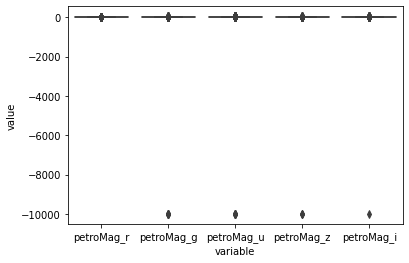

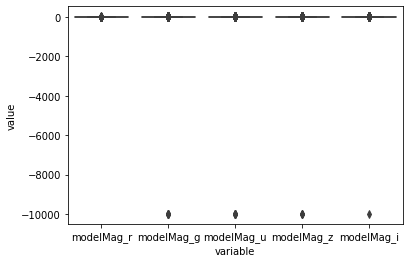

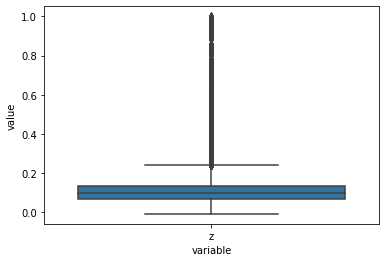

In [19]:
PETROMAG_LIST= ['petroMag_r','petroMag_g','petroMag_u','petroMag_z','petroMag_i']
MODELMAG_LIST= ['modelMag_r','modelMag_g','modelMag_u','modelMag_z','modelMag_i']

def boxplot_col(dataframe, columns_list):
    sns.boxplot(x="variable", y="value", data=pd.melt(dataframe[columns_list]))
    plt.show()
        
boxplot_col(dd, PETROMAG_LIST)
boxplot_col(dd, MODELMAG_LIST)
boxplot_col(dd, ['z'])

In [20]:
print(' - Dataframe shape ANTES de filtrar por NaN values y outliers: {}'.format(dd.shape))
dd = dd.dropna(subset=PETROMAG_LIST)
dd = dd.dropna(subset=MODELMAG_LIST)
dd = dd[(dd.ne(-9999)).all(axis=1)]
print(' - Dataframe shape DESPUES de filtrar por NaN values y outliers: {}'.format(dd.shape))

 - Dataframe shape ANTES de filtrar por NaN values y outliers: (589689, 125)
 - Dataframe shape DESPUES de filtrar por NaN values y outliers: (585382, 125)


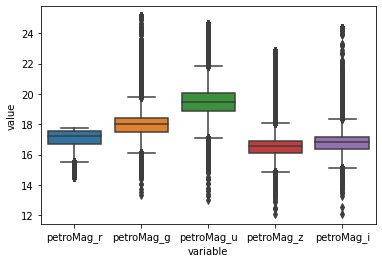

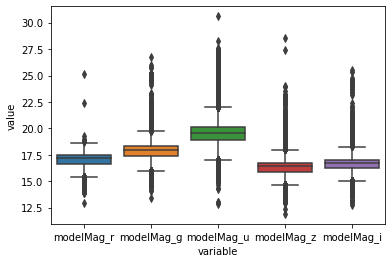

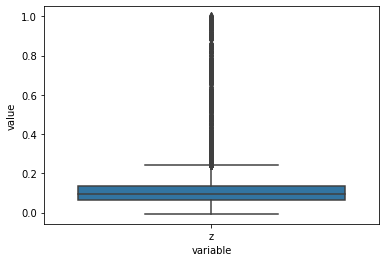

In [21]:
boxplot_col(dd, PETROMAG_LIST)
boxplot_col(dd, MODELMAG_LIST)
boxplot_col(dd, ['z'])

In [22]:
dd[dd.isna().any(axis=1)]

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,elliptical,uncertain,subClass_AGN,subClass_AGN BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST BROADLINE,subClass_STARFORMING,subClass_STARFORMING BROADLINE,subClass_UNKNOWN
specObjID,,,,,,,,,,,,,,,,,,,,,


2.5. 

In [23]:
dd['modelColor_ug'] = dd['modelMag_u'] - dd['modelMag_g']
dd['modelColor_gr'] = dd['modelMag_g'] - dd['modelMag_r']
dd['modelColor_ri'] = dd['modelMag_r'] - dd['modelMag_i']
dd['modelColor_iz'] = dd['modelMag_i'] - dd['modelMag_z']
dd['petroColor_ug'] = dd['petroMag_u'] - dd['petroMag_g']
dd['petroColor_gr'] = dd['petroMag_g'] - dd['petroMag_r']
dd['petroColor_ri'] = dd['petroMag_r'] - dd['petroMag_i']
dd['petroColor_iz'] = dd['petroMag_i'] - dd['petroMag_z']

2.6.

In [24]:
VARS = ["z","subClass_AGN", "subClass_AGN BROADLINE", "subClass_BROADLINE",
       "subClass_STARBURST", "subClass_STARBURST BROADLINE", "subClass_STARFORMING",
       "subClass_STARFORMING BROADLINE", "subClass_UNKNOWN", "velDisp","ra","dec",
       "modelMag_u","modelMag_g","modelMag_r","modelMag_i","modelMag_z",
       "petroMag_u","petroMag_g","petroMag_r","petroMag_i","petroMag_z",
       "petroRad_u","petroRad_g","petroRad_r","petroRad_i","petroRad_z",
       "petroR50_u","petroR50_g","petroR50_r","petroR50_i","petroR50_z",
       "petroR90_u","petroR90_g","petroR90_r","petroR90_i","petroR90_z",
       "deVRad_u","deVRad_g","deVRad_r","deVRad_i","deVRad_z",
       "deVAB_u","deVAB_g","deVAB_r","deVAB_i","deVAB_z",
       "deVPhi_u","deVPhi_g","deVPhi_r","deVPhi_i","deVPhi_z",
       "expRad_u","expRad_g","expRad_r","expRad_i","expRad_z",
       "expAB_u","expAB_g","expAB_r","expAB_i","expAB_z",
       "expPhi_u","expPhi_g","expPhi_r","expPhi_i","expPhi_z",
       "extinction_u","extinction_g","extinction_r","extinction_i","extinction_z",
       "modelColor_ug","modelColor_gr","modelColor_ri","modelColor_iz","petroColor_ug",
       "petroColor_gr","petroColor_ri","petroColor_iz"]
dd = dd[VARS]
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585382 entries, 957075158303008768 to 957064987820451840
Data columns (total 80 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               585382 non-null  float64
 1   subClass_AGN                    585382 non-null  uint8  
 2   subClass_AGN BROADLINE          585382 non-null  uint8  
 3   subClass_BROADLINE              585382 non-null  uint8  
 4   subClass_STARBURST              585382 non-null  uint8  
 5   subClass_STARBURST BROADLINE    585382 non-null  uint8  
 6   subClass_STARFORMING            585382 non-null  uint8  
 7   subClass_STARFORMING BROADLINE  585382 non-null  uint8  
 8   subClass_UNKNOWN                585382 non-null  uint8  
 9   velDisp                         585382 non-null  float64
 10  ra                              585382 non-null  float64
 11  dec                             585382 non-null  

2.7.

In [ ]:
dd.to_csv('../data/DiploDatos_clean.csv',index=True, encoding='utf-8')